In [1]:
import pandas as pd
import numpy as np

In [2]:
# cd /home/anshul/Desktop/Data_Science_Project/dataset/NTU_DATA
import os
os.chdir('/home/ubuntu/NTU_DATA')

!pwd

/home/ubuntu/NTU_DATA


In [3]:
!ls

DNA-Methylation
Gene-Expression-Levels
LUAD_final_integrated_clinical_PCA.png
LUAD_normal_results.csv
LUAD_results.csv
PAAD_PCA_cancer_plot.png
PAAD_PCA_normal_plot.png
PAAD_normal_results.csv
PAAD_results.csv
PC3_KaplanMeier_plot.png
PC3_KaplanMeier_plot_seaborn.png
PRAD_normal_results.csv
PRAD_results.csv
SKCM_final_integrated_clinical_PCA.png
SKCM_normal_results.csv
SKCM_results.csv
STAD_final_integrated_clinical_PCA.png
STAD_normal_results.csv
STAD_results.csv
Survival_SupplementalTable_S1_20171025_xena_sp
TOIL_GTEX_PHENOTYPE_5_CANCERS.csv
TOIL_GTEX_RSEM_TPM_5_CANCERS.csv
Transcription-Factor-Target
final_integrated_clinical_PCA.png
final_integrated_clustering_pca.png
geneAnnotation_hg19_basicgenes.txt
integrated_features_pca_grid_ieee.png
kaplan_grid_ieee_format.png
probeMap_illuminaMethyl450_hg19_GPL16304_TCGAlegacy


## Subtype - PAAD

In [4]:
PAAD_methylation_df = pd.read_csv('DNA-Methylation/PAAD-HumanMethylation450', sep='\t', low_memory=False, index_col="sample")

In [5]:
PAAD_methylation_df.head()

,TCGA-S4-A8RP-01,TCGA-IB-A6UG-01,TCGA-US-A776-01,TCGA-FZ-5926-01,TCGA-HZ-A8P1-01,TCGA-HZ-8636-01,TCGA-IB-AAUO-01,TCGA-RL-AAAS-01,TCGA-IB-7887-01,TCGA-IB-AAUS-01,...,TCGA-3A-A9IH-01,TCGA-2L-AAQI-01,TCGA-2J-AABE-01,TCGA-IB-A5ST-01,TCGA-IB-7645-01,TCGA-M8-A5N4-01,TCGA-IB-7893-01,TCGA-HV-A5A4-01,TCGA-HZ-8005-01,TCGA-Z5-AAPL-01
sample,,,,,,,,,,,,,,,,,,,,,
cg13332474,0.0320,0.3927,0.0351,0.0442,0.0398,0.1937,0.0304,0.0313,0.2684,0.0251,...,0.0305,0.0308,0.0342,0.0379,0.0284,0.0364,0.0340,0.0341,0.0400,0.0349
cg00651829,0.3976,0.1451,0.0209,0.0153,0.5791,0.0243,0.0421,0.0203,0.0216,0.0233,...,0.3247,0.2437,0.2653,0.0183,0.0272,0.0299,0.0244,0.3912,0.0493,0.0211
cg17027195,0.0464,0.5564,0.0417,0.0342,0.6533,0.0443,0.0495,0.0550,0.0383,0.0497,...,0.1028,0.0437,0.0711,0.0366,0.1219,0.0403,0.0484,0.3536,0.0741,0.0483
cg09868354,0.0836,0.1827,0.1700,0.0467,0.0552,0.0565,0.0595,0.1362,0.1121,0.0430,...,0.0655,0.0535,0.1033,0.0881,0.1028,0.0860,0.1030,0.0773,0.1087,0.0887
cg03050183,0.1158,0.1028,0.0706,0.0781,0.0672,0.1067,0.1326,0.1066,0.0956,0.0966,...,0.1063,0.1415,0.1387,0.0791,0.1450,0.1034,0.1294,0.1023,0.1444,0.1189


In [6]:
# num_samples = PAAD_methylation_df.shape[1]

# threshold = 0.20 * num_samples

# missing_per_probe = PAAD_methylation_df.isna().sum(axis=1)

# PAAD_methylation_df = PAAD_methylation_df[missing_per_probe <= threshold]

# print(f"Original number of probes: {PAAD_methylation_df.shape[0]}")
# print(f"Number of probes after filtering: {filtered_methylation_df.shape[0]}")

In [7]:
probe_mapping_df = pd.read_csv('probeMap_illuminaMethyl450_hg19_GPL16304_TCGAlegacy', sep='\t', low_memory=False, index_col="#id")

In [8]:
probe_mapping_df.head()

,gene,chrom,chromStart,chromEnd,strand
#id,,,,,
cg13332474,.,chr7,25935146,25935148,.
cg00651829,"RSPH14,GNAZ",chr22,23413065,23413067,.
cg17027195,AUTS2,chr7,69064092,69064094,.
cg22461835,ADRA1A,chr8,26723364,26723366,.
cg03050183,AP5B1,chr11,65547777,65547779,.


In [9]:
probe_mapping_df.shape

(395985, 5)

In [10]:
MIR100HG_probe_mapping_df = probe_mapping_df[probe_mapping_df["gene"] == "MIR100HG"]
MIR100HG_probe_mapping_df.shape

(31, 5)

In [11]:
MIR100HG_probe_ids = list(MIR100HG_probe_mapping_df.index)

In [12]:
PAAD_MIR100HG_methylation_df = PAAD_methylation_df.loc[PAAD_methylation_df.index.intersection(MIR100HG_probe_ids)]
PAAD_MIR100HG_methylation_df.shape

(31, 195)

In [13]:
PAAD_MIR100HG_methylation_df.head()

,TCGA-S4-A8RP-01,TCGA-IB-A6UG-01,TCGA-US-A776-01,TCGA-FZ-5926-01,TCGA-HZ-A8P1-01,TCGA-HZ-8636-01,TCGA-IB-AAUO-01,TCGA-RL-AAAS-01,TCGA-IB-7887-01,TCGA-IB-AAUS-01,...,TCGA-3A-A9IH-01,TCGA-2L-AAQI-01,TCGA-2J-AABE-01,TCGA-IB-A5ST-01,TCGA-IB-7645-01,TCGA-M8-A5N4-01,TCGA-IB-7893-01,TCGA-HV-A5A4-01,TCGA-HZ-8005-01,TCGA-Z5-AAPL-01
sample,,,,,,,,,,,,,,,,,,,,,
cg24358246,0.0396,0.0349,0.0344,0.0397,0.0766,0.0611,0.0216,0.0639,0.0411,0.0252,...,0.0281,0.0393,0.0453,0.0528,0.0591,0.0500,0.0537,0.0392,0.0555,0.0621
cg13123165,0.8921,0.8104,0.1589,0.7601,0.7364,0.8305,0.6125,0.7910,0.6040,0.8077,...,0.7006,0.8449,0.8412,0.7766,0.8053,0.8177,0.6323,0.6851,0.7249,0.7637
cg00577969,0.9449,0.9285,0.5992,0.9160,0.9433,0.9544,0.9294,0.8967,0.9237,0.9111,...,0.9120,0.9202,0.9032,0.8956,0.9185,0.9385,0.8840,0.9555,0.9386,0.9095
cg10262710,0.2372,0.1982,0.0605,0.2639,0.1714,0.2666,0.2144,0.4053,0.4451,0.5079,...,0.2007,0.3084,0.3059,0.4803,0.5107,0.3041,0.4362,0.1813,0.3297,0.6384
cg14530143,0.7603,0.7565,0.1473,0.7712,0.6287,0.6540,0.8198,0.7501,0.6421,0.7405,...,0.7998,0.7409,0.6582,0.7545,0.7590,0.5961,0.5898,0.4641,0.5822,0.6992


In [14]:
PAAD_probe_merged_df = PAAD_MIR100HG_methylation_df.join(probe_mapping_df, how='inner')
PAAD_probe_merged_df.loc[:, ["gene", "chrom", "chromStart", "chromEnd"]]

,gene,chrom,chromStart,chromEnd
cg24358246,MIR100HG,chr11,122086265,122086267
cg13123165,MIR100HG,chr11,122106235,122106237
cg00577969,MIR100HG,chr11,122156456,122156458
cg10262710,MIR100HG,chr11,122074010,122074012
cg14530143,MIR100HG,chr11,122179527,122179529
cg07991139,MIR100HG,chr11,122191243,122191245
cg14724899,MIR100HG,chr11,122051843,122051845
cg21854228,MIR100HG,chr11,122192426,122192428
cg23920120,MIR100HG,chr11,122239844,122239846
cg18730174,MIR100HG,chr11,122073210,122073212


In [15]:
PAAD_MIR100HG_methylation_df.columns = (PAAD_MIR100HG_methylation_df.columns.astype(str).str.replace(r'-01$', '', regex=True).str.replace('-', '_',  regex=False))
PAAD_MIR100HG_methylation_df.head()

,TCGA_S4_A8RP,TCGA_IB_A6UG,TCGA_US_A776,TCGA_FZ_5926,TCGA_HZ_A8P1,TCGA_HZ_8636,TCGA_IB_AAUO,TCGA_RL_AAAS,TCGA_IB_7887,TCGA_IB_AAUS,...,TCGA_3A_A9IH,TCGA_2L_AAQI,TCGA_2J_AABE,TCGA_IB_A5ST,TCGA_IB_7645,TCGA_M8_A5N4,TCGA_IB_7893,TCGA_HV_A5A4,TCGA_HZ_8005,TCGA_Z5_AAPL
sample,,,,,,,,,,,,,,,,,,,,,
cg24358246,0.0396,0.0349,0.0344,0.0397,0.0766,0.0611,0.0216,0.0639,0.0411,0.0252,...,0.0281,0.0393,0.0453,0.0528,0.0591,0.0500,0.0537,0.0392,0.0555,0.0621
cg13123165,0.8921,0.8104,0.1589,0.7601,0.7364,0.8305,0.6125,0.7910,0.6040,0.8077,...,0.7006,0.8449,0.8412,0.7766,0.8053,0.8177,0.6323,0.6851,0.7249,0.7637
cg00577969,0.9449,0.9285,0.5992,0.9160,0.9433,0.9544,0.9294,0.8967,0.9237,0.9111,...,0.9120,0.9202,0.9032,0.8956,0.9185,0.9385,0.8840,0.9555,0.9386,0.9095
cg10262710,0.2372,0.1982,0.0605,0.2639,0.1714,0.2666,0.2144,0.4053,0.4451,0.5079,...,0.2007,0.3084,0.3059,0.4803,0.5107,0.3041,0.4362,0.1813,0.3297,0.6384
cg14530143,0.7603,0.7565,0.1473,0.7712,0.6287,0.6540,0.8198,0.7501,0.6421,0.7405,...,0.7998,0.7409,0.6582,0.7545,0.7590,0.5961,0.5898,0.4641,0.5822,0.6992


In [16]:
PAAD_average_methylation = PAAD_MIR100HG_methylation_df.mean(axis=0) 
print(PAAD_average_methylation)

TCGA_S4_A8RP    0.563003
TCGA_IB_A6UG    0.531590
TCGA_US_A776    0.236833
TCGA_FZ_5926    0.575374
TCGA_HZ_A8P1    0.547035
                  ...   
TCGA_M8_A5N4    0.581039
TCGA_IB_7893    0.458516
TCGA_HV_A5A4    0.510503
TCGA_HZ_8005    0.514926
TCGA_Z5_AAPL    0.637668
Length: 195, dtype: float64


In [17]:
PAAD_average_methylation.to_csv("../project/dsmp-2024-groupm22/files/PAAD_average_methylation.csv", header=True, index=True)

In [18]:
PAAD_median_MIR100HG = PAAD_average_methylation.median()

PAAD_high_MIR100HG_samples = PAAD_average_methylation[PAAD_average_methylation >= PAAD_median_MIR100HG].index.tolist()
PAAD_low_MIR100HG_samples = PAAD_average_methylation[PAAD_average_methylation < PAAD_median_MIR100HG].index.tolist()

PAAD_high_methylation = PAAD_average_methylation[PAAD_high_MIR100HG_samples]
PAAD_low_methylation = PAAD_average_methylation[PAAD_low_MIR100HG_samples]

In [19]:
from scipy.stats import ttest_ind

stat, p_value = ttest_ind(PAAD_high_methylation, PAAD_low_methylation, equal_var=False)

In [20]:
PAAD_ttest_results = {"stat": stat, "p-value": p_value}

In [21]:
PAAD_ttest_results

{'stat': np.float64(16.945570385763318),
 'p-value': np.float64(6.17722184414582e-35)}

In [22]:
PAAD_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_PAAD.csv', low_memory=False, index_col=0) # Gene expression levels for pancreatic cancer

In [23]:
PAAD_MIR100HG_expression_df = PAAD_gene_expression_levels[PAAD_gene_expression_levels["HGNC_symbol"] == "MIR100HG"]

In [24]:
PAAD_MIR100HG_methylation_T = PAAD_MIR100HG_methylation_df.T
PAAD_MIR100HG_methylation_T

sample,cg24358246,cg13123165,cg00577969,cg10262710,cg14530143,cg07991139,cg14724899,cg21854228,cg23920120,cg18730174,...,cg03402120,cg21585512,cg04883609,cg20721628,cg21170682,cg03261272,cg08087655,cg23834919,cg06000878,cg18362003
TCGA_S4_A8RP,0.0396,0.8921,0.9449,0.2372,0.7603,0.6642,0.9426,0.9290,0.8821,0.2304,...,0.7808,0.2958,0.0241,0.9394,0.7528,0.0716,0.3990,0.6075,0.3884,0.8302
TCGA_IB_A6UG,0.0349,0.8104,0.9285,0.1982,0.7565,0.6241,0.8807,NaN,0.7528,0.2967,...,0.5143,0.2473,0.0269,0.9160,0.8409,0.0933,0.3615,0.8119,0.3997,0.5721
TCGA_US_A776,0.0344,0.1589,0.5992,0.0605,0.1473,0.1327,0.2840,NaN,0.3585,0.1214,...,0.8221,0.0443,0.0524,0.5841,0.0955,0.0842,0.1623,0.1238,0.1029,0.1168
TCGA_FZ_5926,0.0397,0.7601,0.9160,0.2639,0.7712,0.6194,0.9341,0.7718,0.8309,0.3089,...,0.7742,0.3448,0.0212,0.9399,0.7083,0.0482,0.4153,0.6914,0.4896,0.6571
TCGA_HZ_A8P1,0.0766,0.7364,0.9433,0.1714,0.6287,0.7517,0.9278,0.8587,0.9084,0.2015,...,0.7433,0.2727,0.0311,0.9335,0.7731,0.0380,0.2462,0.7843,0.4025,0.8044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA_M8_A5N4,0.0500,0.8177,0.9385,0.3041,0.5961,0.6220,0.9398,0.8837,0.9069,0.3618,...,0.8099,0.3000,0.0203,0.9358,0.5271,0.0541,0.4401,0.7968,0.2608,0.7746
TCGA_IB_7893,0.0537,0.6323,0.8840,0.4362,0.5898,0.4394,0.8319,0.5487,0.7913,0.2012,...,0.6147,0.0949,0.0261,0.9053,0.3232,0.0812,0.3746,0.2891,0.1268,0.4706
TCGA_HV_A5A4,0.0392,0.6851,0.9555,0.1813,0.4641,0.3913,0.9269,0.4878,0.8967,0.2286,...,0.8004,0.1939,0.0193,0.9357,0.8044,0.0493,0.2979,0.5854,0.3643,0.7319
TCGA_HZ_8005,0.0555,0.7249,0.9386,0.3297,0.5822,0.3759,0.8995,0.7587,0.8310,0.2533,...,0.7715,0.1276,0.0288,0.9123,0.4007,0.0736,0.3741,0.6231,0.1433,0.7186


In [25]:
from scipy.stats import pearsonr

def methylation_mir100hg_correlation(MIR100HG_expression_df, MIR100HG_methylation_df):
    MIR100HG_expr_series = MIR100HG_expression_df.loc['ENSG00000255248']
    MIR100HG_methylation_T = MIR100HG_methylation_df.T
    common_samples = MIR100HG_methylation_T.index.intersection(MIR100HG_expr_series.index)
    MIR100HG_methylation_T = MIR100HG_methylation_T.loc[common_samples]
    MIR100HG_expr_series = MIR100HG_expr_series.loc[common_samples]
    
    MIR100HG_methylation_T = MIR100HG_methylation_T.astype(float)
    MIR100HG_expr_series = MIR100HG_expr_series.astype(float)
    
    correlation_results = []
    for probe in MIR100HG_methylation_T.columns:
        methylation_values = MIR100HG_methylation_T[probe]
        
        valid_idx = methylation_values.dropna().index.intersection(MIR100HG_expr_series.dropna().index)
        if len(valid_idx) > 2:
            corr, pval = pearsonr(methylation_values.loc[valid_idx], MIR100HG_expr_series.loc[valid_idx])
            correlation_results.append({
                'Probe': probe,
                'Correlation': corr,
                'P-value': pval
            })
    
    
    correlation_df = pd.DataFrame(correlation_results)
    significant_corrs = correlation_df[correlation_df['P-value'] < 0.05].sort_values(by='Correlation')
    
    print("Top negatively correlated probes:")
    print(significant_corrs.head())
    
    print("\nTop positively correlated probes:")
    print(significant_corrs.tail())

In [26]:
methylation_mir100hg_correlation(PAAD_MIR100HG_expression_df, PAAD_MIR100HG_methylation_df)

Top negatively correlated probes:
         Probe  Correlation   P-value
26  cg03261272    -0.180921  0.015659
13  cg17389813     0.150834  0.047604
22  cg21585512     0.154544  0.039423
1   cg13123165     0.181339  0.015417
20  cg05469118     0.204095  0.006283

Top positively correlated probes:
         Probe  Correlation       P-value
18  cg15826891     0.377966  1.977756e-07
7   cg21854228     0.389790  2.702204e-07
6   cg14724899     0.419475  5.604976e-09
9   cg18730174     0.461101  9.346477e-11
27  cg08087655     0.532093  2.116973e-14


## Subtype - SKCM

In [27]:
SKCM_methylation_df = pd.read_csv('DNA-Methylation/SKCM-HumanMethylation450', sep='\t', low_memory=False, index_col="sample")
SKCM_methylation_df.head()


,TCGA-FR-A728-01,TCGA-GN-A4U8-11,TCGA-GN-A8LL-06,TCGA-FR-A8YC-06,TCGA-DA-A95X-06,TCGA-ER-A42K-06,TCGA-D3-A8GO-06,TCGA-D3-A8GK-06,TCGA-WE-A8JZ-06,TCGA-WE-A8ZO-06,...,TCGA-DA-A3F3-06,TCGA-D3-A51H-06,TCGA-BF-A3DL-01,TCGA-D3-A51T-06,TCGA-D3-A51K-06,TCGA-EB-A44P-01,TCGA-D9-A4Z5-01,TCGA-WE-AAA4-06,TCGA-3N-A9WB-06,TCGA-EE-A3J8-06
sample,,,,,,,,,,,,,,,,,,,,,
cg13332474,0.1290,0.0297,0.0373,0.0238,0.0312,0.0212,0.0208,0.0234,0.0257,0.0536,...,0.0271,0.0250,0.0192,0.0246,0.0305,0.0219,0.0607,0.0288,0.0208,0.9641
cg00651829,0.2394,0.0190,0.0158,0.1759,0.2549,0.0248,0.0208,0.0179,0.0191,0.0204,...,0.0205,0.0223,0.0182,0.0167,0.0191,0.0178,0.0218,0.0215,0.0220,0.5622
cg17027195,0.0337,0.0463,0.0675,0.0362,0.0380,0.0347,0.0346,0.0444,0.0374,0.0409,...,0.0369,0.0344,0.0288,0.0391,0.0693,0.0335,0.0222,0.0464,0.0629,0.0408
cg09868354,0.0913,0.1276,0.0499,0.0779,0.0514,0.1123,0.0908,0.0815,0.0963,0.0795,...,0.0536,0.0602,0.1034,0.0855,0.0781,0.0496,0.0796,0.0793,0.0596,0.0572
cg03050183,0.0782,0.0631,0.0555,0.0570,0.0615,0.0704,0.0791,0.0713,0.0655,0.0719,...,0.0556,0.1181,0.0603,0.0573,0.4288,0.0335,0.0726,0.1103,0.0582,0.0540


In [28]:
SKCM_MIR100HG_methylation_df = SKCM_methylation_df.loc[SKCM_methylation_df.index.intersection(MIR100HG_probe_ids)]
SKCM_MIR100HG_methylation_df.shape

(31, 476)

In [29]:
SKCM_probe_merged_df = SKCM_MIR100HG_methylation_df.join(probe_mapping_df, how='inner')
SKCM_probe_merged_df.loc[:, ["gene", "chrom", "chromStart", "chromEnd"]]

,gene,chrom,chromStart,chromEnd
cg24358246,MIR100HG,chr11,122086265,122086267
cg13123165,MIR100HG,chr11,122106235,122106237
cg00577969,MIR100HG,chr11,122156456,122156458
cg10262710,MIR100HG,chr11,122074010,122074012
cg14530143,MIR100HG,chr11,122179527,122179529
cg07991139,MIR100HG,chr11,122191243,122191245
cg14724899,MIR100HG,chr11,122051843,122051845
cg21854228,MIR100HG,chr11,122192426,122192428
cg23920120,MIR100HG,chr11,122239844,122239846
cg18730174,MIR100HG,chr11,122073210,122073212


In [30]:
SKCM_MIR100HG_methylation_df.columns = (SKCM_MIR100HG_methylation_df.columns.astype(str).str.replace(r'-01$', '', regex=True).str.replace('-', '_',  regex=False))
SKCM_MIR100HG_methylation_df.head()

,TCGA_FR_A728,TCGA_GN_A4U8_11,TCGA_GN_A8LL_06,TCGA_FR_A8YC_06,TCGA_DA_A95X_06,TCGA_ER_A42K_06,TCGA_D3_A8GO_06,TCGA_D3_A8GK_06,TCGA_WE_A8JZ_06,TCGA_WE_A8ZO_06,...,TCGA_DA_A3F3_06,TCGA_D3_A51H_06,TCGA_BF_A3DL,TCGA_D3_A51T_06,TCGA_D3_A51K_06,TCGA_EB_A44P,TCGA_D9_A4Z5,TCGA_WE_AAA4_06,TCGA_3N_A9WB_06,TCGA_EE_A3J8_06
sample,,,,,,,,,,,,,,,,,,,,,
cg24358246,0.0457,0.0930,0.0695,0.0925,0.0572,0.0506,0.0857,0.0535,0.0388,0.0805,...,0.0720,0.0443,0.0536,0.0400,0.1285,0.1656,0.3520,0.0388,0.1221,0.0343
cg13123165,0.4712,0.6491,0.1844,0.6187,0.1849,0.7315,0.5801,0.2958,0.2256,0.8971,...,0.8873,0.8424,0.3764,0.1974,0.8690,0.5578,0.9102,0.5525,0.1831,0.6623
cg00577969,0.6679,0.8412,0.9389,0.7133,0.2322,0.7632,0.9246,0.7155,0.2143,0.9276,...,0.9295,0.9284,0.4929,0.2627,0.8612,0.8705,0.9254,0.8405,0.2132,0.6898
cg10262710,0.3715,0.3824,0.5325,0.3563,0.1487,0.1239,0.3333,0.1062,0.1573,0.2300,...,0.1432,0.6062,0.3563,0.2128,0.4124,0.4353,0.6197,0.4552,0.1254,0.0844
cg14530143,0.5016,0.6281,0.1719,0.5993,0.1445,0.4137,0.4475,0.2501,0.1694,0.8814,...,0.9189,0.7921,0.5493,0.1500,0.9155,0.3261,0.6792,0.5892,0.1307,0.5787


In [31]:
SKCM_average_methylation = SKCM_MIR100HG_methylation_df.mean(axis=0) 
print(SKCM_average_methylation)


TCGA_FR_A728       0.507665
TCGA_GN_A4U8_11    0.559439
TCGA_GN_A8LL_06    0.459948
TCGA_FR_A8YC_06    0.523177
TCGA_DA_A95X_06    0.330226
                     ...   
TCGA_EB_A44P       0.581742
TCGA_D9_A4Z5       0.663155
TCGA_WE_AAA4_06    0.575900
TCGA_3N_A9WB_06    0.440010
TCGA_EE_A3J8_06    0.396419
Length: 476, dtype: float64


In [32]:
SKCM_average_methylation.to_csv("../project/dsmp-2024-groupm22/files/SKCM_average_methylation.csv", header=True, index=True)


In [33]:
SKCM_median_MIR100HG = SKCM_average_methylation.median()

SKCM_high_MIR100HG_samples = SKCM_average_methylation[SKCM_average_methylation >= SKCM_median_MIR100HG].index.tolist()
SKCM_low_MIR100HG_samples = SKCM_average_methylation[SKCM_average_methylation < SKCM_median_MIR100HG].index.tolist()

SKCM_high_methylation = SKCM_average_methylation[SKCM_high_MIR100HG_samples]
SKCM_low_methylation = SKCM_average_methylation[SKCM_low_MIR100HG_samples]


In [34]:
stat, p_value = ttest_ind(SKCM_high_methylation, SKCM_low_methylation, equal_var=False)
SKCM_ttest_results = {"stat": stat, "p-value": p_value}
SKCM_ttest_results


{'stat': np.float64(27.85832547419407),
 'p-value': np.float64(4.2431504673074335e-96)}

In [35]:
SKCM_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_SKCM.csv', low_memory=False, index_col=0)
SKCM_MIR100HG_expression_df = SKCM_gene_expression_levels[SKCM_gene_expression_levels["HGNC_symbol"] == "MIR100HG"]

In [36]:
methylation_mir100hg_correlation(SKCM_MIR100HG_expression_df, SKCM_MIR100HG_methylation_df)

Top negatively correlated probes:
         Probe  Correlation   P-value
27  cg08087655    -0.294393  0.002669
9   cg18730174    -0.279670  0.004620
29  cg06000878    -0.242191  0.014187
15  cg27212940    -0.229395  0.021024
3   cg10262710    -0.226707  0.021945

Top positively correlated probes:
         Probe  Correlation   P-value
28  cg23834919     0.287182  0.003427
17  cg03393223     0.289321  0.003185
24  cg20721628     0.302254  0.002018
6   cg14724899     0.320800  0.001011
16  cg17658568     0.393987  0.000042


## Subtype - LUAD

In [37]:
LUAD_methylation_df = pd.read_csv('DNA-Methylation/LUAD-HumanMethylation450', sep='\t', low_memory=False, index_col="sample")
LUAD_methylation_df.head()

,TCGA-44-4112-01,TCGA-NJ-A4YP-01,TCGA-86-8278-01,TCGA-62-A470-01,TCGA-44-6778-01,TCGA-49-AARQ-01,TCGA-97-A4M1-01,TCGA-55-6975-01,TCGA-99-8033-01,TCGA-78-7149-01,...,TCGA-78-7539-01,TCGA-62-A46S-01,TCGA-95-7947-01,TCGA-J2-8192-01,TCGA-78-7145-01,TCGA-50-6593-01,TCGA-69-7973-01,TCGA-50-6591-11,TCGA-86-7713-01,TCGA-55-8302-01
sample,,,,,,,,,,,,,,,,,,,,,
cg13332474,0.06685,0.3178,0.4128,0.0397,0.0315,0.6965,0.0153,0.0257,0.0296,0.0332,...,0.0457,0.0592,0.4546,0.0372,0.4626,0.2181,0.0309,0.0417,0.0217,0.3117
cg00651829,0.09115,0.2879,0.4702,0.0616,0.0424,0.0226,0.0233,0.0285,0.0210,0.3545,...,0.0169,0.0463,0.0226,0.0222,0.3296,0.1885,0.0300,0.0369,0.0211,0.4026
cg17027195,0.03115,0.1224,0.0446,0.0292,0.0365,0.0780,0.0501,0.0737,0.0167,0.0753,...,0.0259,0.0584,0.0061,0.0187,0.0472,0.0899,0.0505,0.0428,0.0454,0.0337
cg09868354,0.05725,0.1316,0.1409,0.0776,0.0600,0.1044,0.0888,0.0527,0.0434,0.0805,...,0.1067,0.0723,0.0475,0.0496,0.1568,0.0808,0.0503,0.1159,0.0689,0.1147
cg03050183,0.15125,0.1107,0.1082,0.1142,0.0893,0.1220,0.1118,0.1468,0.1109,0.1071,...,0.1287,0.1196,0.0937,0.1077,0.1045,0.1611,0.0949,0.1500,0.1284,0.1141


In [38]:
LUAD_MIR100HG_methylation_df = LUAD_methylation_df.loc[LUAD_methylation_df.index.intersection(MIR100HG_probe_ids)]
LUAD_MIR100HG_methylation_df.shape

(31, 492)

In [39]:
LUAD_probe_merged_df = LUAD_MIR100HG_methylation_df.join(probe_mapping_df, how='inner')
LUAD_probe_merged_df.loc[:, ["gene", "chrom", "chromStart", "chromEnd"]]

,gene,chrom,chromStart,chromEnd
cg24358246,MIR100HG,chr11,122086265,122086267
cg13123165,MIR100HG,chr11,122106235,122106237
cg00577969,MIR100HG,chr11,122156456,122156458
cg10262710,MIR100HG,chr11,122074010,122074012
cg14530143,MIR100HG,chr11,122179527,122179529
cg07991139,MIR100HG,chr11,122191243,122191245
cg14724899,MIR100HG,chr11,122051843,122051845
cg21854228,MIR100HG,chr11,122192426,122192428
cg23920120,MIR100HG,chr11,122239844,122239846
cg18730174,MIR100HG,chr11,122073210,122073212


In [40]:
LUAD_MIR100HG_methylation_df.columns = (LUAD_MIR100HG_methylation_df.columns.astype(str).str.replace(r'-01$', '', regex=True).str.replace('-', '_',  regex=False))
LUAD_MIR100HG_methylation_df.head()

,TCGA_44_4112,TCGA_NJ_A4YP,TCGA_86_8278,TCGA_62_A470,TCGA_44_6778,TCGA_49_AARQ,TCGA_97_A4M1,TCGA_55_6975,TCGA_99_8033,TCGA_78_7149,...,TCGA_78_7539,TCGA_62_A46S,TCGA_95_7947,TCGA_J2_8192,TCGA_78_7145,TCGA_50_6593,TCGA_69_7973,TCGA_50_6591_11,TCGA_86_7713,TCGA_55_8302
sample,,,,,,,,,,,,,,,,,,,,,
cg24358246,0.09100,0.1279,0.1014,0.0874,0.0779,0.0626,0.0684,0.1019,0.0843,0.0869,...,0.0983,0.1124,0.0866,0.0735,0.1117,0.0796,0.1159,0.0879,0.1011,0.1045
cg13123165,0.61195,0.7655,0.6530,0.3940,0.4555,0.7295,0.8061,0.5929,0.7795,0.7546,...,0.4508,0.7071,0.4088,0.5116,0.3527,0.6045,0.4333,0.8101,0.7512,0.7337
cg00577969,0.86970,0.8761,0.8834,0.5244,0.5869,0.7532,0.8061,0.8170,0.9098,0.9368,...,0.7854,0.9013,0.7462,0.8522,0.6693,0.8701,0.7905,0.9082,0.8951,0.9151
cg10262710,0.50560,0.2669,0.2701,0.2953,0.4012,0.4377,0.2849,0.4676,0.4200,0.6258,...,0.4349,0.4697,0.2348,0.2945,0.5321,0.4102,0.3904,0.4403,0.6373,0.3588
cg14530143,0.72030,0.7721,0.8189,0.4328,0.4882,0.3991,0.5608,0.5853,0.8268,0.8771,...,0.4643,0.7401,0.3134,0.4978,0.3954,0.5667,0.3791,0.8805,0.8770,0.8076


In [41]:
LUAD_average_methylation = LUAD_MIR100HG_methylation_df.mean(axis=0) 
print(LUAD_average_methylation)

TCGA_44_4112       0.535103
TCGA_NJ_A4YP       0.541361
TCGA_86_8278       0.500968
TCGA_62_A470       0.373271
TCGA_44_6778       0.419242
                     ...   
TCGA_50_6593       0.519419
TCGA_69_7973       0.454606
TCGA_50_6591_11    0.607513
TCGA_86_7713       0.628158
TCGA_55_8302       0.581352
Length: 492, dtype: float64


In [42]:
LUAD_average_methylation.to_csv("../project/dsmp-2024-groupm22/files/LUAD_average_methylation.csv", header=True, index=True)


In [43]:
LUAD_median_MIR100HG = LUAD_average_methylation.median()

LUAD_high_MIR100HG_samples = LUAD_average_methylation[LUAD_average_methylation >= LUAD_median_MIR100HG].index.tolist()
LUAD_low_MIR100HG_samples = LUAD_average_methylation[LUAD_average_methylation < LUAD_median_MIR100HG].index.tolist()

LUAD_high_methylation = LUAD_average_methylation[LUAD_high_MIR100HG_samples]
LUAD_low_methylation = LUAD_average_methylation[LUAD_low_MIR100HG_samples]


In [44]:
stat, p_value = ttest_ind(LUAD_high_methylation, LUAD_low_methylation, equal_var=False)
LUAD_ttest_results = {"stat": stat, "p-value": p_value}
LUAD_ttest_results


{'stat': np.float64(27.00760398431957),
 'p-value': np.float64(1.2883446844325267e-86)}

In [45]:
LUAD_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_LUAD.csv', low_memory=False, index_col=0)
LUAD_MIR100HG_expression_df = LUAD_gene_expression_levels[LUAD_gene_expression_levels["HGNC_symbol"] == "MIR100HG"]

In [46]:
methylation_mir100hg_correlation(LUAD_MIR100HG_expression_df, LUAD_MIR100HG_methylation_df)

Top negatively correlated probes:
         Probe  Correlation   P-value
13  cg17389813    -0.174273  0.000193
29  cg06000878    -0.165805  0.000394
15  cg27212940    -0.164131  0.000459
20  cg05469118     0.099654  0.033969
9   cg18730174     0.114714  0.014571

Top positively correlated probes:
         Probe  Correlation       P-value
28  cg23834919     0.286399  5.320457e-10
1   cg13123165     0.286637  5.140784e-10
4   cg14530143     0.290079  3.119146e-10
12  cg20723705     0.309017  1.766239e-11
6   cg14724899     0.311939  1.112872e-11


## Subtype - PRAD

In [47]:
PRAD_methylation_df = pd.read_csv('DNA-Methylation/PRAD-HumanMethylation450', sep='\t', low_memory=False, index_col="sample")
PRAD_methylation_df.head()


,TCGA-G9-6343-01,TCGA-KK-A8IA-01,TCGA-KK-A6E4-01,TCGA-EJ-AB20-01,TCGA-H9-7775-01,TCGA-XJ-A9DX-01,TCGA-KK-A6E6-01,TCGA-G9-6339-01,TCGA-EJ-5509-01,TCGA-EJ-5521-01,...,TCGA-EJ-7312-01,TCGA-V1-A8MM-01,TCGA-EJ-A65F-01,TCGA-G9-6498-01,TCGA-EJ-5505-01,TCGA-CH-5761-11,TCGA-HC-8261-01,TCGA-XQ-A8TB-01,TCGA-G9-6329-01,TCGA-EJ-5496-01
sample,,,,,,,,,,,,,,,,,,,,,
cg13332474,0.4721,0.4169,0.8249,0.4844,0.5133,0.4510,0.5251,0.3138,0.6834,0.4068,...,0.5436,0.3365,0.4008,0.0750,0.1677,0.3603,0.59720,0.6409,0.5012,0.4549
cg00651829,0.0397,0.5916,0.6979,0.0172,0.5382,0.0169,0.5381,0.3938,0.3624,0.1003,...,0.4320,0.6108,0.6632,0.2804,0.4091,0.0328,0.34665,0.6153,0.1273,0.4383
cg17027195,0.0422,0.0409,0.0459,0.0391,0.0311,0.0451,0.0580,0.0585,0.0452,0.0352,...,0.0603,0.0404,0.0456,0.0478,0.0368,0.0343,0.06340,0.0507,0.0441,0.0378
cg09868354,0.0444,0.0922,0.0444,0.0867,0.0571,0.0492,0.0456,0.0573,0.0653,0.0464,...,0.1773,0.0771,0.0468,0.0468,0.0514,0.0515,0.06005,0.1549,0.0359,0.0487
cg03050183,0.0784,0.0988,0.1561,0.0941,0.0815,0.0693,0.3764,0.1475,0.0786,0.0793,...,0.0753,0.0987,0.0867,0.0616,0.0829,0.1152,0.09675,0.3103,0.2192,0.0995


In [48]:
PRAD_MIR100HG_methylation_df = PRAD_methylation_df.loc[PRAD_methylation_df.index.intersection(MIR100HG_probe_ids)]
PRAD_MIR100HG_methylation_df.shape

(31, 549)

In [49]:
PRAD_probe_merged_df = PRAD_MIR100HG_methylation_df.join(probe_mapping_df, how='inner')
PRAD_probe_merged_df.loc[:, ["gene", "chrom", "chromStart", "chromEnd"]]

,gene,chrom,chromStart,chromEnd
cg24358246,MIR100HG,chr11,122086265,122086267
cg13123165,MIR100HG,chr11,122106235,122106237
cg00577969,MIR100HG,chr11,122156456,122156458
cg10262710,MIR100HG,chr11,122074010,122074012
cg14530143,MIR100HG,chr11,122179527,122179529
cg07991139,MIR100HG,chr11,122191243,122191245
cg14724899,MIR100HG,chr11,122051843,122051845
cg21854228,MIR100HG,chr11,122192426,122192428
cg23920120,MIR100HG,chr11,122239844,122239846
cg18730174,MIR100HG,chr11,122073210,122073212


In [50]:
PRAD_MIR100HG_methylation_df.columns = (PRAD_MIR100HG_methylation_df.columns.astype(str).str.replace(r'-01$', '', regex=True).str.replace('-', '_',  regex=False))
PRAD_MIR100HG_methylation_df.head()

,TCGA_G9_6343,TCGA_KK_A8IA,TCGA_KK_A6E4,TCGA_EJ_AB20,TCGA_H9_7775,TCGA_XJ_A9DX,TCGA_KK_A6E6,TCGA_G9_6339,TCGA_EJ_5509,TCGA_EJ_5521,...,TCGA_EJ_7312,TCGA_V1_A8MM,TCGA_EJ_A65F,TCGA_G9_6498,TCGA_EJ_5505,TCGA_CH_5761_11,TCGA_HC_8261,TCGA_XQ_A8TB,TCGA_G9_6329,TCGA_EJ_5496
sample,,,,,,,,,,,,,,,,,,,,,
cg24358246,0.0665,0.0596,0.0297,0.0847,0.0611,0.0800,0.0467,0.0529,0.0672,0.0558,...,0.0574,0.0558,0.0483,0.0784,0.1071,0.0572,0.08775,0.0493,0.0554,0.0873
cg13123165,0.4192,0.5234,0.3567,0.9109,0.7340,0.8661,0.4646,0.4893,0.4453,0.5726,...,0.5375,0.2641,0.8069,0.3540,0.4714,0.9145,0.50635,0.3584,0.7461,0.6308
cg00577969,0.6545,0.9282,0.8961,0.9268,0.9376,0.9094,0.8786,0.7318,0.5821,0.7621,...,0.4703,0.2537,0.8997,0.6397,0.8631,0.8144,0.72680,0.8559,0.8775,0.8661
cg10262710,0.1942,0.2856,0.2163,0.2187,0.1309,0.1673,0.2571,0.2024,0.2777,0.3898,...,0.1420,0.0898,0.1864,0.2450,0.3234,0.3954,0.35855,0.1038,0.5414,0.2396
cg14530143,0.4054,0.6697,0.3106,0.9193,0.3128,0.9180,0.4708,0.4933,0.3638,0.4625,...,0.3329,0.1128,0.6299,0.3880,0.6751,0.8887,0.43860,0.1814,0.6424,0.7167


In [51]:
PRAD_average_methylation = PRAD_MIR100HG_methylation_df.mean(axis=0) 
print(PRAD_average_methylation)

TCGA_G9_6343       0.394170
TCGA_KK_A8IA       0.576377
TCGA_KK_A6E4       0.463461
TCGA_EJ_AB20       0.623968
TCGA_H9_7775       0.522619
                     ...   
TCGA_CH_5761_11    0.593835
TCGA_HC_8261       0.486755
TCGA_XQ_A8TB       0.405832
TCGA_G9_6329       0.543890
TCGA_EJ_5496       0.530426
Length: 549, dtype: float64


In [52]:
PRAD_average_methylation.to_csv("../project/dsmp-2024-groupm22/files/PRAD_average_methylation.csv", header=True, index=True)


In [53]:
PRAD_median_MIR100HG = PRAD_average_methylation.median()

PRAD_high_MIR100HG_samples = PRAD_average_methylation[PRAD_average_methylation >= PRAD_median_MIR100HG].index.tolist()
PRAD_low_MIR100HG_samples = PRAD_average_methylation[PRAD_average_methylation < PRAD_median_MIR100HG].index.tolist()

PRAD_high_methylation = PRAD_average_methylation[PRAD_high_MIR100HG_samples]
PRAD_low_methylation = PRAD_average_methylation[PRAD_low_MIR100HG_samples]

In [54]:
stat, p_value = ttest_ind(PRAD_high_methylation, PRAD_low_methylation, equal_var=False)
PRAD_ttest_results = {"stat": stat, "p-value": p_value}
PRAD_ttest_results


{'stat': np.float64(33.78597711121504),
 'p-value': np.float64(7.006739980215561e-117)}

In [55]:
PRAD_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_PRAD.csv', low_memory=False, index_col=0)
PRAD_MIR100HG_expression_df = PRAD_gene_expression_levels[PRAD_gene_expression_levels["HGNC_symbol"] == "MIR100HG"]

In [56]:
methylation_mir100hg_correlation(PRAD_MIR100HG_expression_df, PRAD_MIR100HG_methylation_df)

Top negatively correlated probes:
         Probe  Correlation   P-value
26  cg03261272    -0.175150  0.000090
23  cg04883609    -0.165504  0.000217
14  cg12239342    -0.147219  0.001020
21  cg03402120    -0.135465  0.002526
10  cg15617346    -0.097792  0.029597

Top positively correlated probes:
        Probe  Correlation       P-value
6  cg14724899     0.409839  1.790458e-21
1  cg13123165     0.421793  8.993226e-23
8  cg23920120     0.424631  5.870759e-23
5  cg07991139     0.447921  8.464152e-26
7  cg21854228     0.449798  5.494944e-25


## Subtype - STAD

In [57]:
STAD_methylation_df = pd.read_csv('DNA-Methylation/STAD-HumanMethylation450', sep='\t', low_memory=False, index_col="sample")
STAD_methylation_df.head()

,TCGA-VQ-A94P-01,TCGA-D7-6521-01,TCGA-VQ-A8PE-01,TCGA-D7-6519-01,TCGA-BR-6452-01,TCGA-BR-8485-01,TCGA-VQ-A8PO-01,TCGA-VQ-AA69-01,TCGA-BR-8683-01,TCGA-BR-8486-01,...,TCGA-D7-8573-01,TCGA-BR-A44T-01,TCGA-RD-A8MV-01,TCGA-CD-8536-01,TCGA-BR-8360-01,TCGA-BR-8291-01,TCGA-FP-8210-01,TCGA-RD-A7BS-01,TCGA-BR-A44U-01,TCGA-CD-8529-01
sample,,,,,,,,,,,,,,,,,,,,,
cg13332474,0.0292,0.0316,0.0374,0.0288,0.1329,0.1365,0.0321,0.8723,0.0276,0.0325,...,0.5999,0.0244,0.0382,0.0297,0.0290,0.0274,0.0334,0.0310,0.0238,0.0324
cg00651829,0.0195,0.0221,0.0239,0.0284,0.2258,0.0258,0.5080,0.7349,0.0448,0.0220,...,0.6431,0.0257,0.0218,0.3515,0.6029,0.0194,0.0662,0.0184,0.0290,0.0170
cg17027195,0.1024,0.0960,0.0581,0.9058,0.7273,0.0424,0.8035,0.9452,0.0356,0.0363,...,0.9110,0.0439,0.3053,0.7953,0.7900,0.0426,0.0764,0.5055,0.6612,0.0521
cg09868354,0.0716,0.0863,0.1128,0.0764,0.0689,0.0694,0.0609,0.0814,0.0429,0.0709,...,0.0704,0.0515,0.0636,0.0700,0.0662,0.0531,0.0784,0.1344,0.0459,0.1320
cg03050183,0.1387,0.0937,0.0746,0.0696,0.0818,0.1016,0.0924,0.1129,0.1243,0.0868,...,0.0584,0.1336,0.0592,0.0744,0.0520,0.0850,0.1399,0.1310,0.1208,0.0915


In [58]:
STAD_MIR100HG_methylation_df = STAD_methylation_df.loc[STAD_methylation_df.index.intersection(MIR100HG_probe_ids)]
STAD_MIR100HG_methylation_df.shape

(31, 398)

In [59]:
STAD_probe_merged_df = STAD_MIR100HG_methylation_df.join(probe_mapping_df, how='inner')
STAD_probe_merged_df.loc[:, ["gene", "chrom", "chromStart", "chromEnd"]]

,gene,chrom,chromStart,chromEnd
cg24358246,MIR100HG,chr11,122086265,122086267
cg13123165,MIR100HG,chr11,122106235,122106237
cg00577969,MIR100HG,chr11,122156456,122156458
cg10262710,MIR100HG,chr11,122074010,122074012
cg14530143,MIR100HG,chr11,122179527,122179529
cg07991139,MIR100HG,chr11,122191243,122191245
cg14724899,MIR100HG,chr11,122051843,122051845
cg21854228,MIR100HG,chr11,122192426,122192428
cg23920120,MIR100HG,chr11,122239844,122239846
cg18730174,MIR100HG,chr11,122073210,122073212


In [60]:
STAD_MIR100HG_methylation_df.columns = (STAD_MIR100HG_methylation_df.columns.astype(str).str.replace(r'-01$', '', regex=True).str.replace('-', '_',  regex=False))
STAD_MIR100HG_methylation_df.head()

,TCGA_VQ_A94P,TCGA_D7_6521,TCGA_VQ_A8PE,TCGA_D7_6519,TCGA_BR_6452,TCGA_BR_8485,TCGA_VQ_A8PO,TCGA_VQ_AA69,TCGA_BR_8683,TCGA_BR_8486,...,TCGA_D7_8573,TCGA_BR_A44T,TCGA_RD_A8MV,TCGA_CD_8536,TCGA_BR_8360,TCGA_BR_8291,TCGA_FP_8210,TCGA_RD_A7BS,TCGA_BR_A44U,TCGA_CD_8529
sample,,,,,,,,,,,,,,,,,,,,,
cg24358246,0.0823,0.0472,0.0701,0.0519,0.0583,0.0619,0.0532,0.0640,0.0794,0.0598,...,0.0439,0.0846,0.0523,0.0336,0.0331,0.0486,0.0584,0.0526,0.1124,0.0575
cg13123165,0.5345,0.5063,0.5900,0.2194,0.5772,0.3266,0.3560,0.1747,0.8266,0.4029,...,0.2833,0.7232,0.4419,0.4624,0.5255,0.5603,0.7146,0.5648,0.3825,0.5552
cg00577969,0.9128,0.9375,0.6026,0.9025,0.9436,0.6008,0.9352,0.7007,0.9525,0.6510,...,0.7311,0.9605,0.8977,0.9083,0.9132,0.7749,0.9359,0.8807,0.9317,0.8694
cg10262710,0.4198,0.3978,0.2022,0.1271,0.5163,0.2658,0.5514,0.2259,0.3540,0.3161,...,0.8090,0.4778,0.3364,0.5253,0.7482,0.3238,0.3971,0.4247,0.7219,0.3668
cg14530143,0.7968,0.6784,0.2914,0.1846,0.5584,0.3300,0.4196,0.1552,0.5671,0.3923,...,0.3410,0.7188,0.4351,0.4614,0.6179,0.5711,0.8088,0.5290,0.3326,0.6205


In [61]:
STAD_average_methylation = STAD_MIR100HG_methylation_df.mean(axis=0) 
print(STAD_average_methylation)

TCGA_VQ_A94P    0.523303
TCGA_D7_6521    0.523819
TCGA_VQ_A8PE    0.342539
TCGA_D7_6519    0.352306
TCGA_BR_6452    0.471729
                  ...   
TCGA_BR_8291    0.452083
TCGA_FP_8210    0.587029
TCGA_RD_A7BS    0.455216
TCGA_BR_A44U    0.464452
TCGA_CD_8529    0.467271
Length: 398, dtype: float64


In [62]:
STAD_average_methylation.to_csv("../project/dsmp-2024-groupm22/files/STAD_average_methylation.csv", header=True, index=True)


In [63]:
STAD_median_MIR100HG = STAD_average_methylation.median()

STAD_high_MIR100HG_samples = STAD_average_methylation[STAD_average_methylation >= STAD_median_MIR100HG].index.tolist()
STAD_low_MIR100HG_samples = STAD_average_methylation[STAD_average_methylation < STAD_median_MIR100HG].index.tolist()

STAD_high_methylation = STAD_average_methylation[STAD_high_MIR100HG_samples]
STAD_low_methylation = STAD_average_methylation[STAD_low_MIR100HG_samples]


In [64]:
stat, p_value = ttest_ind(STAD_high_methylation, STAD_low_methylation, equal_var=False)
STAD_ttest_results = {"stat": stat, "p-value": p_value}
STAD_ttest_results


{'stat': np.float64(26.81857020484577),
 'p-value': np.float64(3.0829526691174663e-87)}

In [65]:
STAD_gene_expression_levels = pd.read_csv('Gene-Expression-Levels/TOIL_RSEM_TPM_STAD.csv', low_memory=False, index_col=0)
STAD_MIR100HG_expression_df = STAD_gene_expression_levels[STAD_gene_expression_levels["HGNC_symbol"] == "MIR100HG"]

In [66]:
methylation_mir100hg_correlation(STAD_MIR100HG_expression_df, STAD_MIR100HG_methylation_df)

Top negatively correlated probes:
         Probe  Correlation   P-value
26  cg03261272    -0.140978  0.006531
14  cg12239342    -0.103060  0.047294
27  cg08087655     0.136527  0.008459
28  cg23834919     0.140131  0.006864
29  cg06000878     0.155193  0.002724

Top positively correlated probes:
         Probe  Correlation       P-value
6   cg14724899     0.378952  4.085267e-14
7   cg21854228     0.407528  1.951436e-15
18  cg15826891     0.434804  1.888247e-18
4   cg14530143     0.463335  3.839398e-21
16  cg17658568     0.480541  8.952535e-23


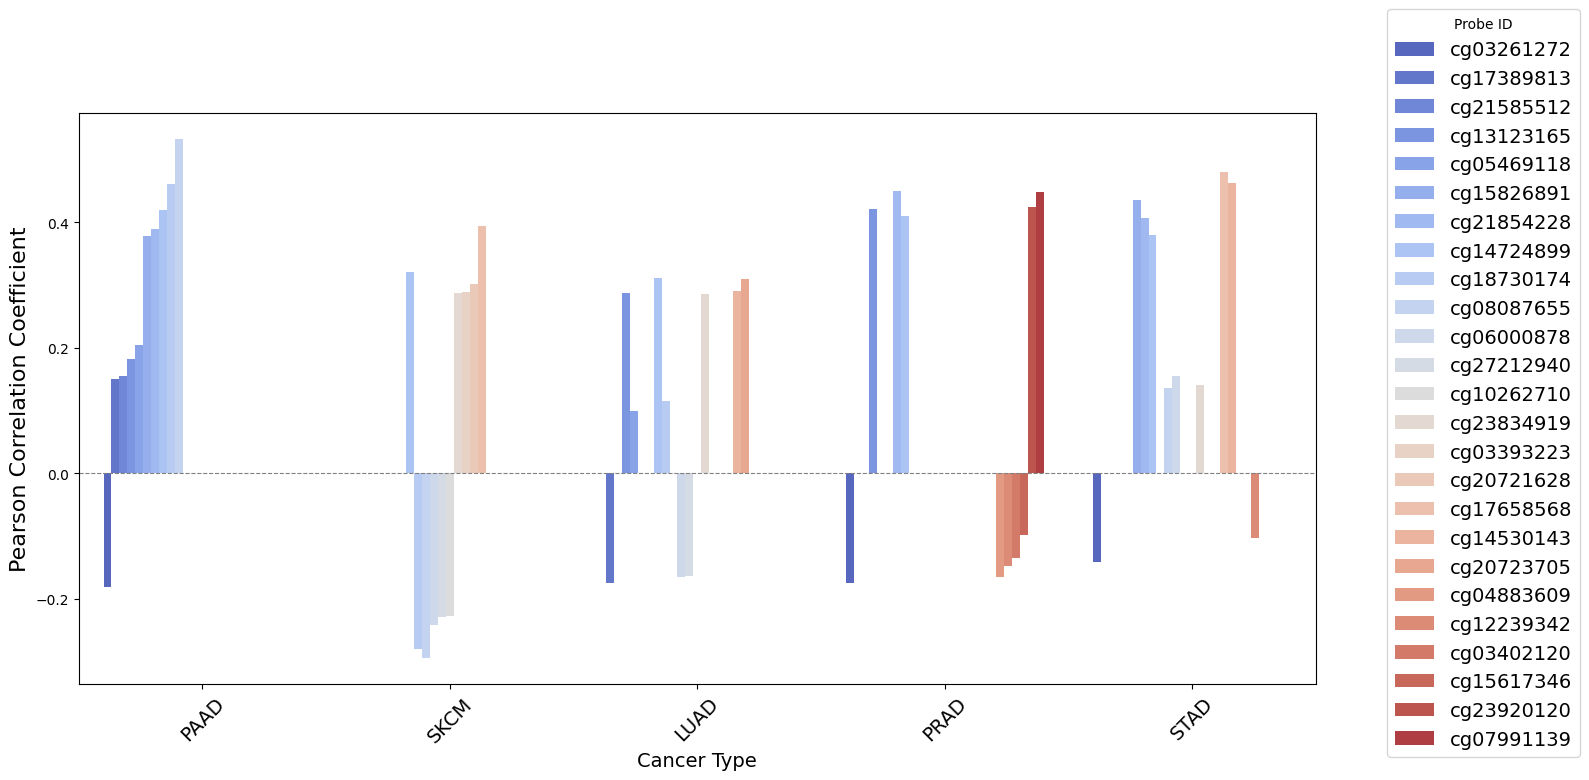

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data dictionary from your provided methylation correlations
data = {
    'Cancer Type': ['PAAD'] * 10 + ['SKCM'] * 10 + ['LUAD'] * 10 + ['PRAD'] * 10 + ['STAD'] * 10,
    'Probe': [
        'cg03261272', 'cg17389813', 'cg21585512', 'cg13123165', 'cg05469118',
        'cg15826891', 'cg21854228', 'cg14724899', 'cg18730174', 'cg08087655',
        'cg08087655', 'cg18730174', 'cg06000878', 'cg27212940', 'cg10262710',
        'cg23834919', 'cg03393223', 'cg20721628', 'cg14724899', 'cg17658568',
        'cg17389813', 'cg06000878', 'cg27212940', 'cg05469118', 'cg18730174',
        'cg23834919', 'cg13123165', 'cg14530143', 'cg20723705', 'cg14724899',
        'cg03261272', 'cg04883609', 'cg12239342', 'cg03402120', 'cg15617346',
        'cg14724899', 'cg13123165', 'cg23920120', 'cg07991139', 'cg21854228',
        'cg03261272', 'cg12239342', 'cg08087655', 'cg23834919', 'cg06000878',
        'cg14724899', 'cg21854228', 'cg15826891', 'cg14530143', 'cg17658568'
    ],
    'Correlation': [
        -0.180921, 0.150834, 0.154544, 0.181339, 0.204095, 
        0.377966, 0.389790, 0.419475, 0.461101, 0.532093,
        -0.294393, -0.279670, -0.242191, -0.229395, -0.226707,
        0.287182, 0.289321, 0.302254, 0.320800, 0.393987,
        -0.174273, -0.165805, -0.164131, 0.099654, 0.114714,
        0.286399, 0.286637, 0.290079, 0.309017, 0.311939,
        -0.175150, -0.165504, -0.147219, -0.135465, -0.097792,
        0.409839, 0.421793, 0.424631, 0.447921, 0.449798,
        -0.140978, -0.103060, 0.136527, 0.140131, 0.155193,
        0.378952, 0.407528, 0.434804, 0.463335, 0.480541
    ]
}

df = pd.DataFrame(data)

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(data=df, x='Cancer Type', y='Correlation', hue='Probe', dodge=True, palette='coolwarm')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.xlabel('Cancer Type', fontsize=14)
plt.ylabel('Pearson Correlation Coefficient', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1.2), loc='upper left', title='Probe ID', fontsize=14)
plt.tight_layout()
plt.savefig(f"../project/dsmp-2024-groupm22/plots/Correlation of Top Methylation Probes with MIR100HG Expression.png", dpi=300, bbox_inches='tight')
plt.show()
